In [ ]:
# DETECTION

In [ ]:
#1
#MAN IN THE MIDDLE (MITM)

#MITM attack ek aisa cyber attack hota hai jisme attacker user aur server ke beech ka data secretly intercept karke usse read ya modify karta hai.  
#Ye attack tab hota hai jab attacker beech mein ghuske dono taraf ko yeh lagwata hai ki woh directly ek dusre se baat kar rahe hain.  



Tampered Logs Detected:
                source          destination         timestamp  \
436        10.10.10.10    TAMPERED_NODE_436  2023-09-15T18:01   
3719          10.0.0.2   TAMPERED_NODE_3719  2023-09-16T07:15   
5453   232.131.118.249   TAMPERED_NODE_5453  2023-09-12T15:14   
12470    192.168.1.100  TAMPERED_NODE_12470  2023-09-13T03:01   
17671    192.168.1.100  TAMPERED_NODE_17671  2023-09-15T05:02   

                                           original_hash  \
436    2f7e9c45952de36cac4c2e16e92482ce6c6ac6d15725b0...   
3719   68b06b15dbfaba44bda7dc1d13bb1ae1c8006718dec740...   
5453   db60ae8743df65b2d409b3c07cc74ae78425f751f28bc7...   
12470  771eed745af3bad23ae781d07cc7292d98fb2358cd4b4a...   
17671  3272f18090dea731db85150795253c291568225412cbb8...   

                                                new_hash  
436    3fd5856be0fe6203252b045a68b44cbb27ac6bc6fcf509...  
3719   868e137b29dc432d0e5214dc29efd2be6dec749e6083a8...  
5453   b6bfb1cfd5c953c85fc8e5b6580c306c7403c6d2

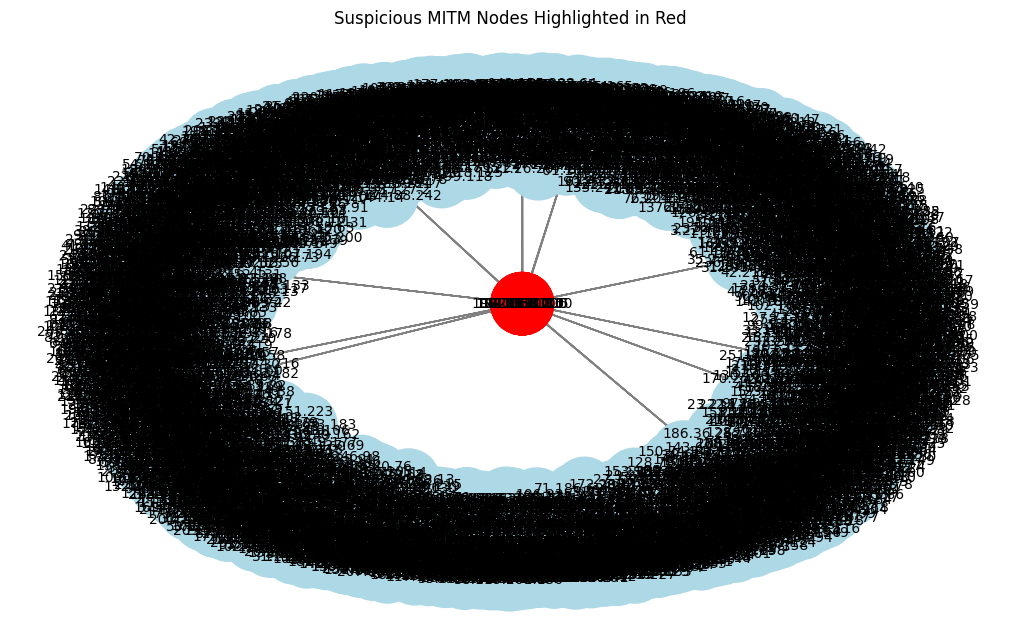

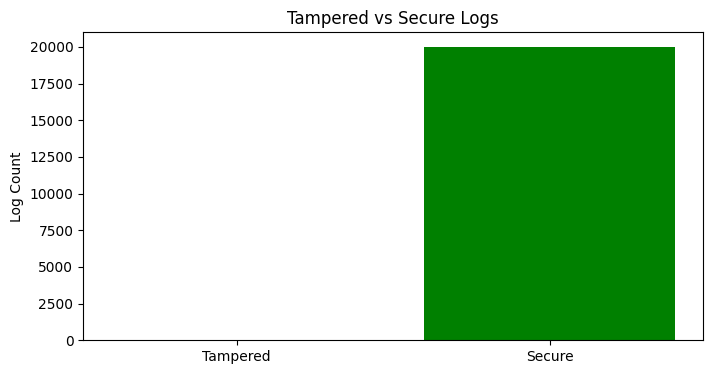

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import hashlib
import random
from collections import Counter

# Load the CSV file
df = pd.read_csv('main.csv')

# Ensure correct column names
source_col = 'source'
destination_col = 'destination'
timestamp_col = 'timestamp'

# Step 1: Build a network graph
G = nx.DiGraph()
for index, row in df.iterrows():
    G.add_edge(row[source_col], row[destination_col], timestamp=row[timestamp_col])

# Step 2: Compute original log hashes
def compute_hash(data):
    return hashlib.sha256(data.encode()).hexdigest()

df['original_hash'] = df.apply(lambda row: compute_hash(str(row[source_col]) + str(row[destination_col]) + str(row[timestamp_col])), axis=1)

# Step 3: Introduce controlled tampering (Modify 5 random logs)
tampered_indices = random.sample(range(len(df)), 5)
for i in tampered_indices:
    df.at[i, destination_col] = 'TAMPERED_NODE_' + str(i)  # Modify destination field

df['new_hash'] = df.apply(lambda row: compute_hash(str(row[source_col]) + str(row[destination_col]) + str(row[timestamp_col])), axis=1)

# Step 4: Detect tampered logs
tampered_logs = df[df['original_hash'] != df['new_hash']]
print("Tampered Logs Detected:")
print(tampered_logs[['source', 'destination', 'timestamp', 'original_hash', 'new_hash']])

# Step 5: Detect MITM Nodes
node_counts = Counter(df[source_col])
threshold = df.shape[0] * 0.05  # More than 5% interactions are suspicious
suspicious_nodes = [node for node, count in node_counts.items() if count > threshold]

print("Potential MITM Nodes Detected:", suspicious_nodes)

# Step 6: Visualize network with MITM nodes highlighted
color_map = ['red' if node in suspicious_nodes else 'lightblue' for node in G.nodes()]
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color=color_map, edge_color='gray', node_size=2000, font_size=10)
plt.title("Suspicious MITM Nodes Highlighted in Red")
plt.show()

# Step 7: Visualize tampered logs
plt.figure(figsize=(8, 4))
plt.bar(['Tampered', 'Secure'], [len(tampered_logs), len(df) - len(tampered_logs)], color=['red', 'green'])
plt.title("Tampered vs Secure Logs")
plt.ylabel("Log Count")
plt.show()
